In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Schmitt-trigger

## Sima komparátor
<b> $\mu$A741 </b> műverősítő

C:\Users\schba\AppData\Local\Temp\ipykernel_24840\576367973.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data.to_latex(column_format='c|c', decimal=',', float_format="$%.2f \pm 0,05$", index=False).replace('\\textbackslash ', '\\').replace('\$', '$').replace('\_', '_'))


\begin{tabular}{c|c}
\toprule
       $U_\{be\}$ &          $U_\{ki\}$ \\
\midrule
$3,50 \pm 0,05$ &  $14,36 \pm 0,05$ \\
$4,00 \pm 0,05$ &  $14,36 \pm 0,05$ \\
$4,50 \pm 0,05$ &  $14,36 \pm 0,05$ \\
$4,60 \pm 0,05$ &  $14,36 \pm 0,05$ \\
$4,65 \pm 0,05$ &  $14,36 \pm 0,05$ \\
$4,67 \pm 0,05$ &  $14,36 \pm 0,05$ \\
$4,69 \pm 0,05$ & $-12,77 \pm 0,05$ \\
$4,70 \pm 0,05$ & $-12,77 \pm 0,05$ \\
$4,80 \pm 0,05$ & $-12,80 \pm 0,05$ \\
$5,00 \pm 0,05$ & $-12,80 \pm 0,05$ \\
\bottomrule
\end{tabular}


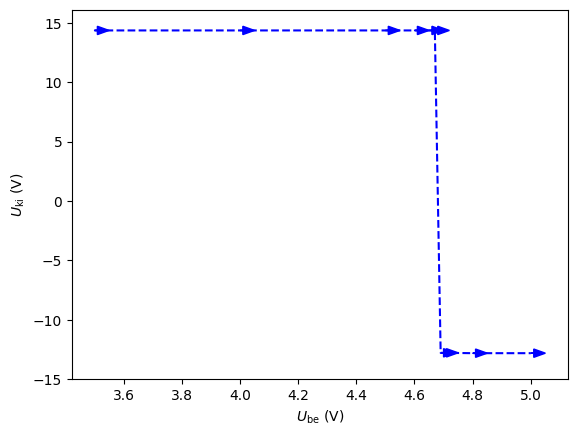

In [2]:
R2 = 9.95e3
R3 = 99.8e3
R1 = 22.0e3
Up, Um = 15, -15

U1 = R2/(R1+R2)*Up

Ube = np.array([3.5, 4.0, 4.5, 4.6, 4.65, 4.67, 4.69, 4.70, 4.8, 5.0])
Uki = np.array([14.36, 14.36, 14.36, 14.36, 14.36, 14.36, -12.77, -12.77, -12.8, -12.8])
data = pd.DataFrame({'$U_{be}$': Ube, '$U_{ki}$': Uki})
print(data.to_latex(column_format='c|c', decimal=',', float_format="$%.2f \pm 0,05$", index=False).replace('\\textbackslash ', '\\').replace('\$', '$').replace('\_', '_'))

%matplotlib inline
fig, ax = plt.subplots()
ax.plot(Ube, Uki, 'b--')
for i in range(len(Ube)):
    ax.arrow(Ube[i], Uki[i], 0.01, 0., head_width=0.7, head_length=0.04, fc='b', ec='b')
ax.set_xlabel(r'$U_\mathrm{be}$ (V)')
ax.set_ylabel(r'$U_\mathrm{ki}$ (V)')
ax.set_yticks([-15, -10, -5, 0, 5, 10, 15])
plt.savefig('1komp'+'.pdf', format='pdf', dpi=1000, bbox_inches='tight')

## Schmitt kapcsolás

$$ U_1=\dfrac{R_p}{R_1}\cdot U_++\dfrac{R_p}{R_3}\cdot U_\mathrm{ki} $$

C:\Users\schba\AppData\Local\Temp\ipykernel_24840\1318296020.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data.to_latex(column_format='c|c', decimal=',', float_format="$%.2f \pm 0,05$", index=False).replace('\\textbackslash ', '\\').replace('\$', '$').replace('\_', '_'))


\begin{tabular}{c|c}
\toprule
       $U_\{be\}$ &          $U_\{ki\}$ \\
\midrule
$2,00 \pm 0,05$ &  $14,26 \pm 0,05$ \\
$3,00 \pm 0,05$ &  $14,26 \pm 0,05$ \\
$3,50 \pm 0,05$ &  $14,26 \pm 0,05$ \\
$4,00 \pm 0,05$ &  $14,26 \pm 0,05$ \\
$4,50 \pm 0,05$ &  $14,26 \pm 0,05$ \\
$5,00 \pm 0,05$ &  $14,26 \pm 0,05$ \\
$5,10 \pm 0,05$ &  $14,26 \pm 0,05$ \\
$5,15 \pm 0,05$ &  $14,26 \pm 0,05$ \\
$5,26 \pm 0,05$ &  $14,26 \pm 0,05$ \\
$5,30 \pm 0,05$ & $-12,80 \pm 0,05$ \\
$5,34 \pm 0,05$ & $-12,80 \pm 0,05$ \\
$5,50 \pm 0,05$ & $-12,80 \pm 0,05$ \\
$5,00 \pm 0,05$ & $-12,80 \pm 0,05$ \\
$4,50 \pm 0,05$ & $-12,80 \pm 0,05$ \\
$4,00 \pm 0,05$ & $-12,80 \pm 0,05$ \\
$3,59 \pm 0,05$ & $-12,80 \pm 0,05$ \\
$3,55 \pm 0,05$ &  $14,26 \pm 0,05$ \\
$3,51 \pm 0,05$ &  $14,26 \pm 0,05$ \\
$3,00 \pm 0,05$ &  $14,26 \pm 0,05$ \\
\bottomrule
\end{tabular}


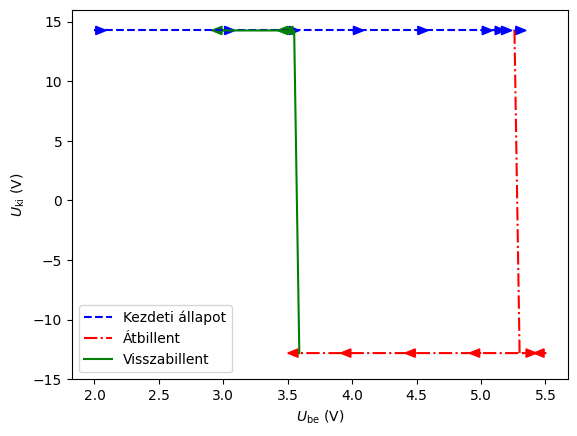

In [3]:
Rp= 1/(1/R1+1/R2+1/R3)

Uki2 = np.array([14.26, -12.8])
U1 = Rp/R1*Up+Rp/R3*Uki2
U1h = np.sqrt((0.009**2+(0.1/9.95)**2+(0.05/15)**2)*(Rp/R1*Up)**2+(0.009**2+(0.2/99.8)**2+(0.05/15)**2)*(Rp/R3*Uki2)**2)

Ube = np.array([2., 3., 3.5, 4., 4.5, 5., 5.1, 5.15, 5.26, 5.30, 5.34, 5.5, 5., 4.5, 4., 3.59, 3.55, 3.51, 3.])
Uki = np.array([14.26, 14.26, 14.26, 14.26, 14.26, 14.26, 14.26, 14.26, 14.26, -12.80, -12.8, -12.8, -12.8, -12.8, -12.8, -12.8, 14.26, 14.26, 14.26])

data = pd.DataFrame({'$U_{be}$': Ube, '$U_{ki}$': Uki})
print(data.to_latex(column_format='c|c', decimal=',', float_format="$%.2f \pm 0,05$", index=False).replace('\\textbackslash ', '\\').replace('\$', '$').replace('\_', '_'))

%matplotlib inline
fig, ax = plt.subplots()
ax.plot(Ube[:9], Uki[:9], 'b--', label='Kezdeti állapot')
ax.plot(Ube[8:16], Uki[8:16], 'r-.', label='Átbillent')
ax.plot(Ube[15:], Uki[15:], 'g-', label= 'Visszabillent')
for i in range(len(Ube)):
    if i<9:
        ax.arrow(Ube[i], Uki[i], 0.01, 0., head_width=0.7, head_length=0.08, fc='b', ec='b')
    elif i==10:
        ax.arrow(Ube[i], Uki[i], 0.01, 0., head_width=0.7, head_length=0.08, fc='r', ec='r')
    elif 10<=i<16:
        ax.arrow(Ube[i], Uki[i], -0.01, 0., head_width=0.7, head_length=0.08, fc='r', ec='r')
    elif 16<=i:
        ax.arrow(Ube[i], Uki[i], -0.01, 0., head_width=0.7, head_length=0.08, fc='g', ec='g')
ax.set_xlabel(r'$U_\mathrm{be}$ (V)')
ax.set_ylabel(r'$U_\mathrm{ki}$ (V)')
ax.legend()
ax.set_yticks([-15, -10, -5, 0, 5, 10, 15])
plt.savefig('2sch'+'.pdf', format='pdf', dpi=1000, bbox_inches='tight')

## Tranzisztor izé
<b> BC182 </b> tranzisztor
Magas feszültségen telítésbe megy a két tranzisztor, így a kiadott fszültséget $\approx 1,7~$V-tal követni fogja a kimenő feszültség ($2\cdot U_\mathrm{BE}$)

C:\Users\schba\AppData\Local\Temp\ipykernel_24840\3747384472.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data.to_latex(column_format='c|c', decimal=',', float_format="$%.2f \pm 0,05$", index=False).replace('\\textbackslash ', '\\').replace('\$', '$').replace('\_', '_'))


\begin{tabular}{c|c}
\toprule
       $U_\{be\}$ &        $U_\{ki\}$ \\
\midrule
$0,50 \pm 0,05$ & $0,51 \pm 0,05$ \\
$0,60 \pm 0,05$ & $0,51 \pm 0,05$ \\
$0,70 \pm 0,05$ & $0,51 \pm 0,05$ \\
$0,90 \pm 0,05$ & $0,51 \pm 0,05$ \\
$0,95 \pm 0,05$ & $0,51 \pm 0,05$ \\
$0,97 \pm 0,05$ & $4,94 \pm 0,05$ \\
$1,50 \pm 0,05$ & $4,95 \pm 0,05$ \\
$1,00 \pm 0,05$ & $4,95 \pm 0,05$ \\
$0,94 \pm 0,05$ & $4,95 \pm 0,05$ \\
$0,85 \pm 0,05$ & $4,95 \pm 0,05$ \\
$0,83 \pm 0,05$ & $0,49 \pm 0,05$ \\
$0,80 \pm 0,05$ & $0,49 \pm 0,05$ \\
$7,00 \pm 0,05$ & $5,31 \pm 0,05$ \\
$7,10 \pm 0,05$ & $5,38 \pm 0,05$ \\
$7,20 \pm 0,05$ & $5,50 \pm 0,05$ \\
$7,30 \pm 0,05$ & $5,60 \pm 0,05$ \\
$7,40 \pm 0,05$ & $5,65 \pm 0,05$ \\
$7,50 \pm 0,05$ & $5,75 \pm 0,05$ \\
$7,60 \pm 0,05$ & $5,85 \pm 0,05$ \\
$7,70 \pm 0,05$ & $5,90 \pm 0,05$ \\
$7,80 \pm 0,05$ & $6,00 \pm 0,05$ \\
\bottomrule
\end{tabular}

[ 0.86166666 -0.71633332]
[[ 0.00050437 -0.0037323 ]
 [-0.0037323   0.02765265]]
0.03887301263230186


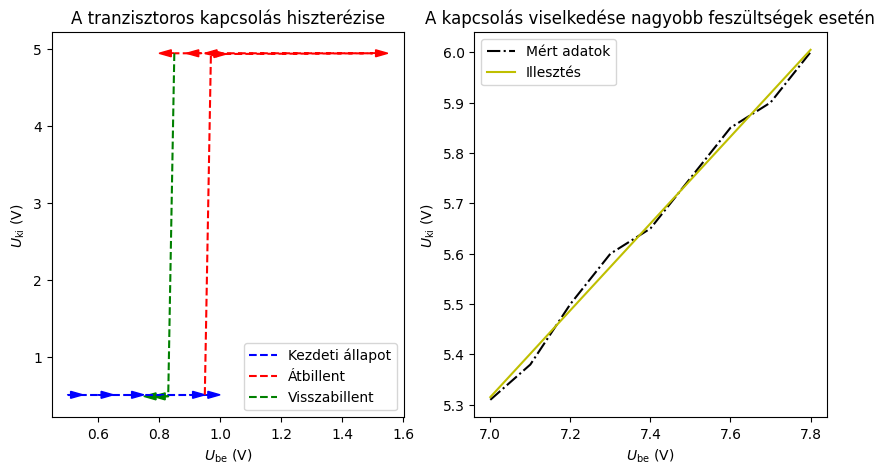

In [4]:
Ra = 9.91e3
Rt1 = 2.18e3
Rt2 = 0.99e3
Re = 99.3
Vcc = 5.

Vlt = (Vcc*Re)/(Re+Rt1)+0.6
Vut = (Vcc*Re)/(Re+Rt2)+0.6

Ube = np.array([0.5, 0.6, 0.7, 0.9, 0.95, 0.97, 1.5, 1., 0.94, 0.85, 0.83, 0.8, 7., 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8])
Uki = np.array([0.51, 0.51, 0.51, 0.51, 0.51, 4.94, 4.95, 4.95, 4.95, 4.95, 0.49, 0.49, 5.31, 5.38, 5.50, 5.60, 5.65, 5.75, 5.85, 5.9, 6.])

data = pd.DataFrame({'$U_{be}$': Ube, '$U_{ki}$': Uki})
print(data.to_latex(column_format='c|c', decimal=',', float_format="$%.2f \pm 0,05$", index=False).replace('\\textbackslash ', '\\').replace('\$', '$').replace('\_', '_'))

f = lambda t, a, b: a*t+b
[fit, cov] = curve_fit(f, Ube[12:], Uki[12:])
print(fit)
print(cov)
print(np.std(Uki[12:]-Ube[12:]))

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].plot(Ube[:5], Uki[:5], 'b--', label='Kezdeti állapot')
ax[0].plot(Ube[4:10], Uki[4:10], 'r--', label='Átbillent')
ax[0].plot(Ube[9:12], Uki[9:12], 'g--', label= 'Visszabillent')
ax[0].set_xlabel(r'$U_\mathrm{be}$ (V)')
ax[0].set_ylabel(r'$U_\mathrm{ki}$ (V)')
ax[0].legend()
ax[0].set_title('A tranzisztoros kapcsolás hiszterézise')
ax[1].plot(Ube[12:], Uki[12:], 'k-.', label='Mért adatok')
ax[1].plot(Ube[12:], f(Ube[12:], fit[0], fit[1]), 'y-', label='Illesztés')
ax[1].set_xlabel(r'$U_\mathrm{be}$ (V)')
ax[1].set_ylabel(r'$U_\mathrm{ki}$ (V)')
ax[1].legend()
ax[1].set_title('A kapcsolás viselkedése nagyobb feszültségek esetén')
for i in range(len(Ube)):
    if i<5:
        ax[0].arrow(Ube[i], Uki[i], 0.01, 0., head_width=0.09, head_length=0.04, fc='b', ec='b')
    elif 5<=i<7:
        ax[0].arrow(Ube[i], Uki[i], 0.01, 0., head_width=0.09, head_length=0.04, fc='r', ec='r')
    elif 7<=i<10:
        ax[0].arrow(Ube[i], Uki[i], -0.01, 0., head_width=0.09, head_length=0.04, fc='r', ec='r')
    elif 10<=i<12:
        ax[0].arrow(Ube[i], Uki[i], -0.01, 0., head_width=0.09, head_length=0.04, fc='g', ec='g')
plt.savefig('3fig'+'.pdf', format='pdf', dpi=1000, bbox_inches='tight')

## Astabil multivibrátor
<b> TL071 </b> műveleti erősítő
19. csv file: $U_{in-}$
20. csv file: $U_{in+}$
21. csv: $U_{ki}$
<b> $\mu$A741 </b>
hasonló

In [6]:
R3 = 22.0e3
R2 = R2
f = 12e3
Ub1 = Up*R2/(R2+R3)
Ub2 = Um*R2/(R2+R3)
R1C = 1/(2*f*np.log((Up+Ub1)/(Up+Ub2)))

C = 6.8e-9 # nF
R1 = Ra
T = 2*R1*C*np.log((Up+Ub1)/(Up+Ub2))
print(1/T)
f = 11.66e3 # Hz

fig, ax = plt.subplots(nrows=3, ncols=2, squeeze=False, sharex='col', figsize=(10, 10))
for i in range(19,25):
    j = ((i-19)%3, (i-19)//3)
    i = '0'+str(i) if i<10 else str(i)
    data = pd.read_csv('data\\SDS000'+i+'.CSV', skiprows=2, header=None, usecols=(3, 4)).to_numpy()
    t = data[:,0]
    ch1 = data[:,1]
    ax[j].set_xlabel(r't (s)')
    if j[0]==0:
        ax[j].set_ylabel(r'$U_2$ (V)', color='b')
    elif j[0]==1:
        ax[j].set_ylabel(r'$U_1$ (V)', color='b')
    elif j[0]==2:
        ax[j].set_ylabel(r'$U_\mathrm{ki}$ (V)', color='b')
    ax[j].tick_params(axis='y', labelcolor='b')
    ax[j].plot(t, ch1, 'b', label='Derivált jel')
    fig.tight_layout()
    print(np.min(ch1))
ax[2,0].set_title(r'A mért adatsorok $\mathbf{TL-071}$ használatával', y=-0.29)
ax[2,1].set_title(r'A mért adatsorok $\mathbf{\mu A-741}$ használatával', y=-0.29)
plt.savefig('4abr'+'.pdf', format='pdf', dpi=1000, bbox_inches='tight')

%matplotlib qt
data = pd.read_csv('data\\SDS000'+'24'+'.CSV', skiprows=2, header=None, usecols=(3, 4)).to_numpy()
plt.plot(data[:,0], data[:,1])

11516.94988053362
-4.2
-4.2
-13.2
-4.8
-4.0
-12.6
